In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

# Problema 1

In [71]:
mean=0.04
std_dev=0.10
years=17
n_sims = 1000
annual_contribution = 20000
total_investment = years*annual_contribution

In [50]:
# Given parameters
def simulate(rates):

    # Initialize the value of the investment
    final_value = 0
    accum_by_year = []
    saved_by_year = []
    # Calculate the investment value year by year
    for rate in rates:
        next_value = (final_value + annual_contribution) * (1 + rate)
        saved_by_year.append(next_value - final_value)
        final_value = next_value
        accum_by_year.append(final_value)

    return final_value, accum_by_year, saved_by_year


In [66]:
final_values = []
accumulated_by_year_by_sim = []
saved_by_year_by_sim = []
for i in range(n_sims):
    random_rates = np.random.normal(loc=mean, scale=std_dev, size=years)
    final_value, accum_by_year, saved_by_year = simulate(random_rates)
    final_values.append(final_value)
    accumulated_by_year_by_sim.append(accum_by_year)
    saved_by_year_by_sim.append(saved_by_year)

In [81]:
mean_final_value = np.mean(final_values)
min_final_value = np.min(final_values)
max_final_value = np.max(final_values)
print(f"Rendimientos promedio después de ${years} años: ${mean_final_value:,.2f}")
print(f"Escenario pesimista después de ${years} años: ${min_final_value:,.2f}")
print(f"Escenario optimista después de ${years} años: ${max_final_value:,.2f}")

Rendimientos promedio después de $17 años: $494,070.09
Escenario pesimista después de $17 años: $219,973.05
Escenario optimista después de $17 años: $1,438,118.48


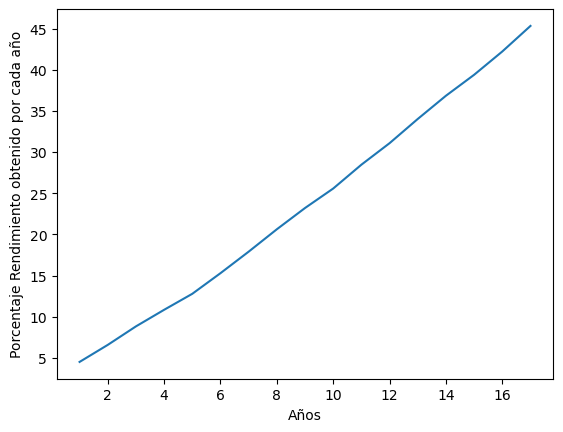

In [83]:
# Transpose the list to group values by position
transposed_lists = np.array(accumulated_by_year_by_sim).T

# Calculate the average for each position and subtract 2000 times the position
adjusted_averages = [
    (np.mean(group) - annual_contribution * (pos+1))/(annual_contribution * (pos+1))*100 for pos, group in enumerate(transposed_lists)
]
plt.xlabel("Años")
plt.ylabel("Porcentaje Rendimiento obtenido por cada año")
plt.plot(range(1, years+1), adjusted_averages) 

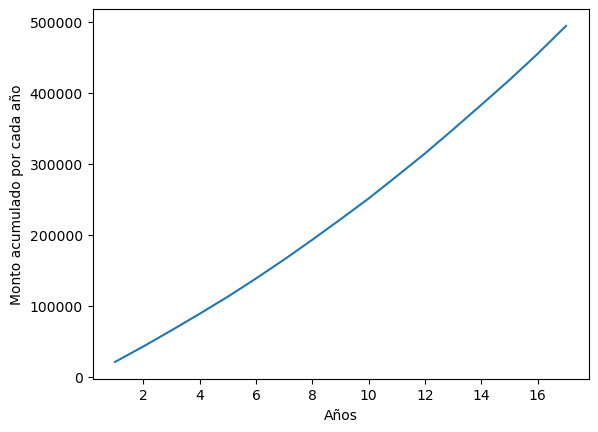

In [68]:
# Transpose the list to group values by position
transposed_lists = np.array(accumulated_by_year_by_sim).T
# Calculate the average for each position
averages = [np.mean(group) for group in transposed_lists]
plt.xlabel("Años")
plt.ylabel("Monto acumulado por cada año")
plt.plot(range(1, years+1), averages)

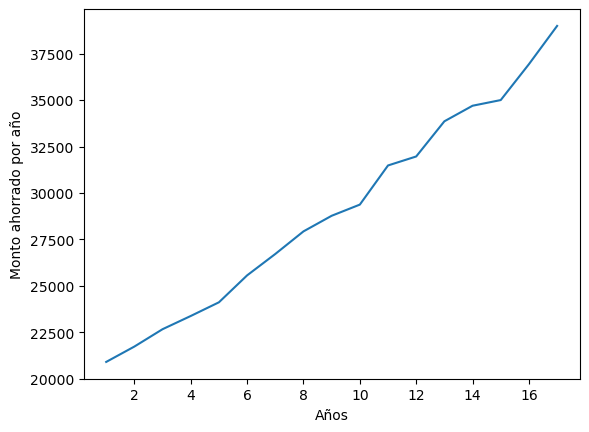

In [69]:
# Transpose the list to group values by position
transposed_lists = np.array(saved_by_year_by_sim).T

# Calculate the average for each position
averages = [np.mean(group) for group in transposed_lists]
plt.xlabel("Años")
plt.ylabel("Monto ahorrado por año")
plt.plot(range(1, years+1), averages)

# Problema 2

In [98]:
df = pd.read_csv('advertising.csv')
variables = ['TV', 'Radio', 'Newspaper']

In [99]:
X = df[variables]
Y = df['Sales']
model = LinearRegression()
model.fit(X, Y)
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficients:  [ 0.04576465  0.18853002 -0.00103749]
Intercept:  2.9388893694594067


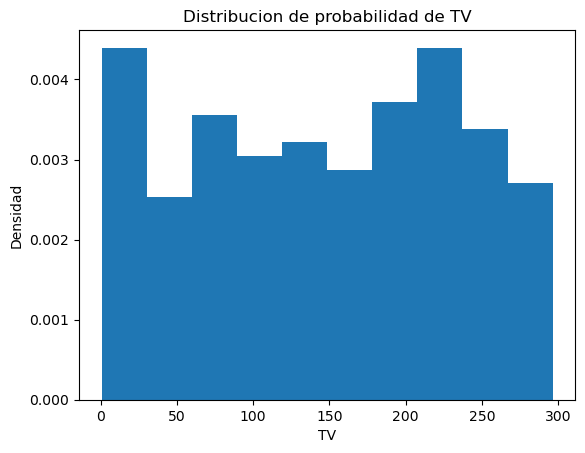

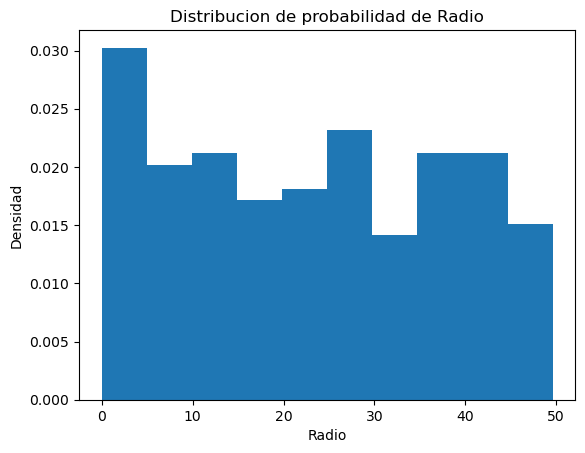

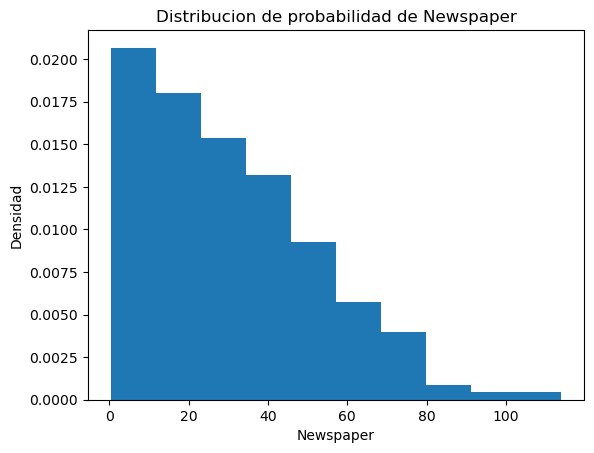

In [101]:
for var in variables:
    plt.figure()
    plt.hist(df[var], bins=10, density=True)
    plt.xlabel(var)
    plt.ylabel("Densidad")
    plt.title(f"Distribucion de probabilidad de {var}")

In [104]:
for var in variables:
    mean = df[var].mean()
    std  = df[var].std()
    print(f"Para {var}. Media: {mean:.2f}, Desviacion standard {std:.2f}")

Para TV. Media: 147.04, Desviacion standard 85.85
Para Radio. Media: 23.26, Desviacion standard 14.85
Para Newspaper. Media: 30.55, Desviacion standard 21.78


In [106]:
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(df['TV'],
           distributions=get_common_distributions())
f.fit()
f.summary()

ModuleNotFoundError: No module named 'fitter'